In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

pd.set_option('display.max_columns', None)

# Load data

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.columns[2:]

Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AGE',
       'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_FAMILY_STATUS_Widow', 'NAME_CONTRACT_TYPE_Cash loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M',
       'NAME_HO

In [4]:
target = df[["TARGET"]]
data = df.iloc[:,2:]
col = []
for column in df.columns[2:]:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE":
        continue
    else:
        col.append(column)

# Correlation matrix

<AxesSubplot:>

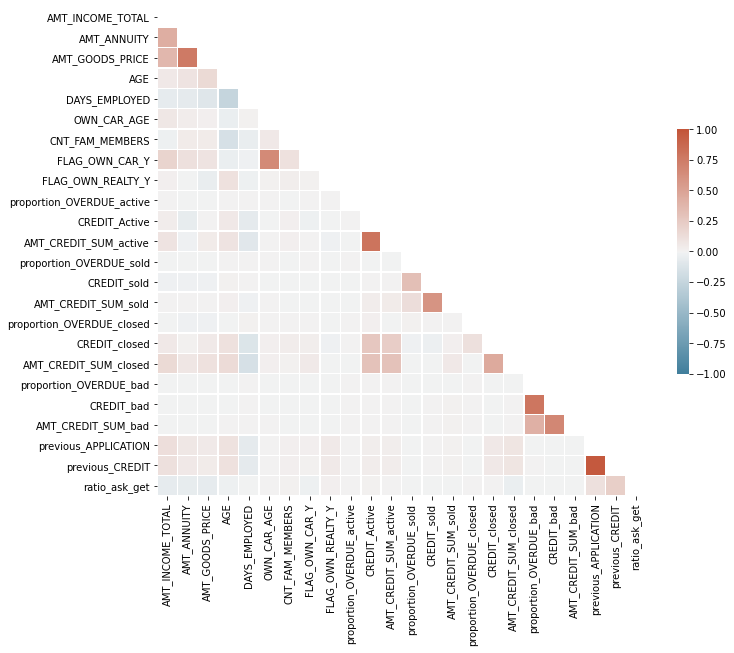

In [5]:
corrM = df[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

Some variables are correlated. The correlation between them is not surprising

# Candidate's sex

In [6]:
tmp = df[df["TARGET"] == 0]["CODE_GENDER_M"].value_counts(normalize = True)
"For accepted loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For accepted loan sex ratio between female and male are 0.63/0.37'

In [7]:
tmp = df[df["TARGET"] == 1]["CODE_GENDER_M"].value_counts(normalize = True)
"For rejected loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For rejected loan sex ratio between female and male are 0.55/0.45'

# Workers repartition

In [8]:
col = []
for columns in df.columns:
    if columns[:16] == "NAME_INCOME_TYPE":
        col.append(columns)

## Application rejected

In [9]:
df[df["TARGET"] == 1][col].sum()

NAME_INCOME_TYPE_Businessman                 0
NAME_INCOME_TYPE_Commercial associate     4893
NAME_INCOME_TYPE_Maternity leave             2
NAME_INCOME_TYPE_Pensioner                   0
NAME_INCOME_TYPE_State servant            1097
NAME_INCOME_TYPE_Student                     0
NAME_INCOME_TYPE_Working                 14334
dtype: int64

<AxesSubplot:ylabel='None'>

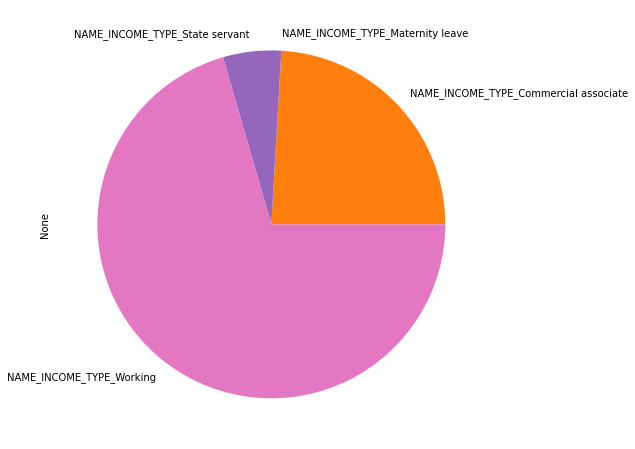

In [10]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [11]:
df[df["TARGET"] == 0][col].sum()

NAME_INCOME_TYPE_Businessman                  4
NAME_INCOME_TYPE_Commercial associate     57235
NAME_INCOME_TYPE_Maternity leave              2
NAME_INCOME_TYPE_Pensioner                    6
NAME_INCOME_TYPE_State servant            16240
NAME_INCOME_TYPE_Student                     16
NAME_INCOME_TYPE_Working                 128946
dtype: int64

<AxesSubplot:ylabel='None'>

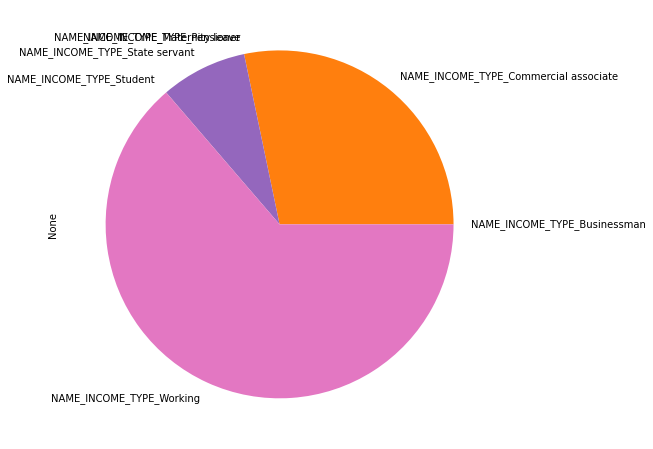

In [12]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Education type

In [13]:
col = []
for columns in df.columns:
    if columns[:19] == "NAME_EDUCATION_TYPE":
        col.append(columns)

## Application rejected

In [14]:
df[df["TARGET"] == 1][col].sum()

NAME_EDUCATION_TYPE_Academic degree                      2
NAME_EDUCATION_TYPE_Higher education                  3247
NAME_EDUCATION_TYPE_Incomplete higher                  790
NAME_EDUCATION_TYPE_Lower secondary                    305
NAME_EDUCATION_TYPE_Secondary / secondary special    15982
dtype: int64

<AxesSubplot:ylabel='None'>

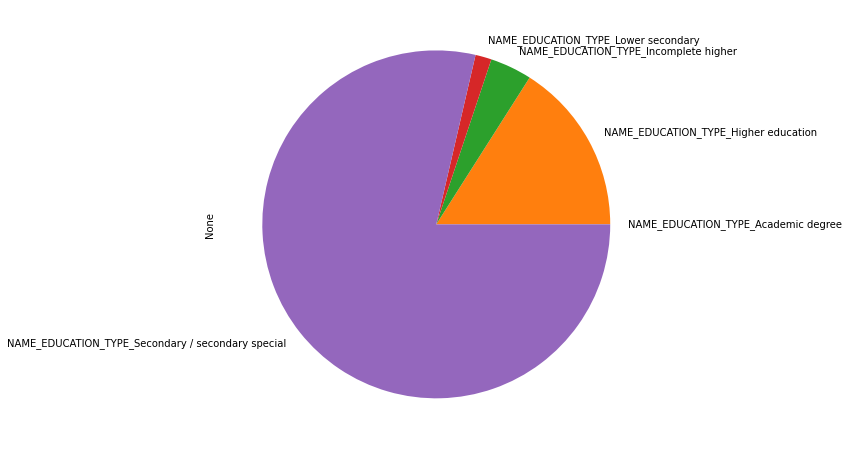

In [15]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [16]:
df[df["TARGET"] == 0][col].sum()

NAME_EDUCATION_TYPE_Academic degree                     109
NAME_EDUCATION_TYPE_Higher education                  52341
NAME_EDUCATION_TYPE_Incomplete higher                  8216
NAME_EDUCATION_TYPE_Lower secondary                    1818
NAME_EDUCATION_TYPE_Secondary / secondary special    139965
dtype: int64

<AxesSubplot:ylabel='None'>

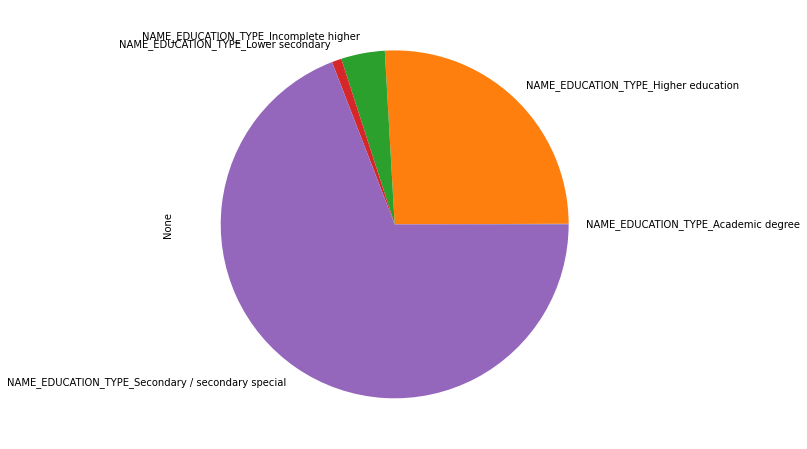

In [17]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Family status

In [18]:
len("NAME_FAMILY_STATUS")

18

In [19]:
col = []
for columns in df.columns:
    if columns[:18] == "NAME_FAMILY_STATUS":
        col.append(columns)

## Application rejected

In [20]:
df[df["TARGET"] == 1][col].sum()

NAME_FAMILY_STATUS_Civil marriage           2591
NAME_FAMILY_STATUS_Married                 12213
NAME_FAMILY_STATUS_Separated                1263
NAME_FAMILY_STATUS_Single / not married     3907
NAME_FAMILY_STATUS_Unknown                     0
NAME_FAMILY_STATUS_Widow                     352
dtype: int64

<AxesSubplot:ylabel='None'>

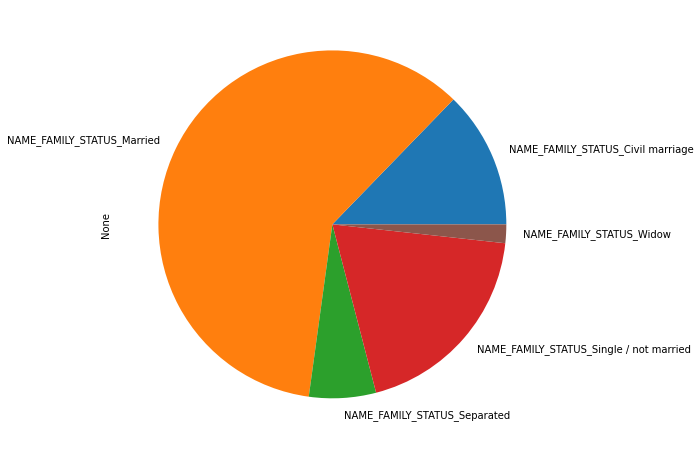

In [21]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [22]:
df[df["TARGET"] == 0][col].sum()

NAME_FAMILY_STATUS_Civil marriage           21280
NAME_FAMILY_STATUS_Married                 131479
NAME_FAMILY_STATUS_Separated                12685
NAME_FAMILY_STATUS_Single / not married     31864
NAME_FAMILY_STATUS_Unknown                      0
NAME_FAMILY_STATUS_Widow                     5141
dtype: int64

<AxesSubplot:ylabel='None'>

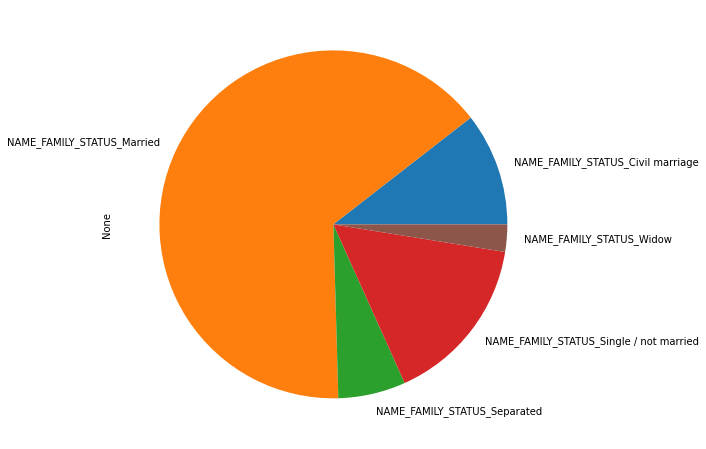

In [23]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Car owner

Text(0.5, 1.0, 'Porportion of owner car for rejected credits')

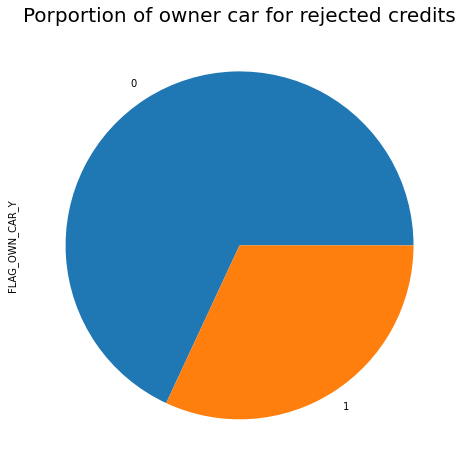

In [24]:
df[df["TARGET"] == 1]['FLAG_OWN_CAR_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for rejected credits", size = 20)

Text(0.5, 1.0, 'Porportion of owner car for accepted credits')

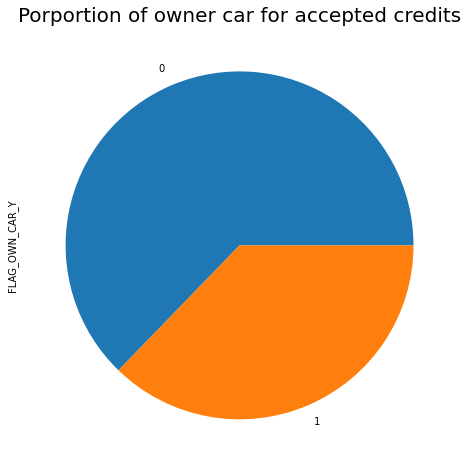

In [25]:
df[df["TARGET"] == 0]['FLAG_OWN_CAR_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for accepted credits", size = 20)

# Own reality 

Text(0.5, 1.0, 'Porportion of owner car for rejected credits')

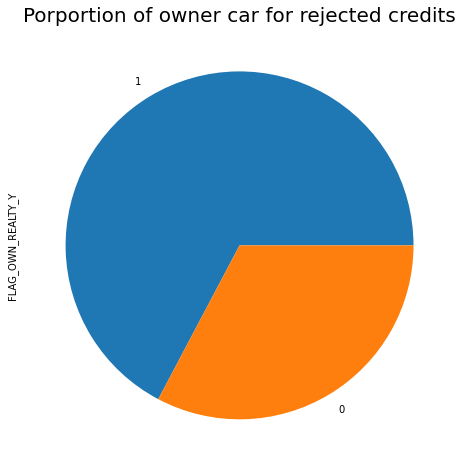

In [26]:
df[df["TARGET"] == 1]['FLAG_OWN_REALTY_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for rejected credits", size = 20)

Text(0.5, 1.0, 'Porportion of owner car for accepted credits')

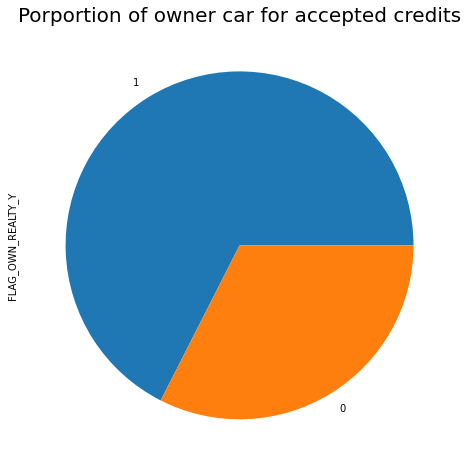

In [27]:
df[df["TARGET"] == 0]['FLAG_OWN_REALTY_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for accepted credits", size = 20)

# Occupation type

In [28]:
len("OCCUPATION_TYPE")

15

In [29]:
col = []
for columns in df.columns:
    if columns[:15] == "OCCUPATION_TYPE":
        col.append(columns)

In [30]:
df[df["TARGET"] == 1][col].sum()

OCCUPATION_TYPE_Accountants               429
OCCUPATION_TYPE_Cleaning staff            426
OCCUPATION_TYPE_Cooking staff             600
OCCUPATION_TYPE_Core staff               1575
OCCUPATION_TYPE_Drivers                  1996
OCCUPATION_TYPE_HR staff                   32
OCCUPATION_TYPE_High skill tech staff     626
OCCUPATION_TYPE_IT staff                   31
OCCUPATION_TYPE_Laborers                 5514
OCCUPATION_TYPE_Low-skill Laborers        358
OCCUPATION_TYPE_Managers                 1018
OCCUPATION_TYPE_Medicine staff            497
OCCUPATION_TYPE_Private service staff     164
OCCUPATION_TYPE_Realty agents              56
OCCUPATION_TYPE_Sales staff              3011
OCCUPATION_TYPE_Secretaries                85
OCCUPATION_TYPE_Security staff            696
OCCUPATION_TYPE_Waiters/barmen staff      149
dtype: int64

In [31]:
df[df["TARGET"] == 0][col].sum()

OCCUPATION_TYPE_Accountants               8141
OCCUPATION_TYPE_Cleaning staff            3938
OCCUPATION_TYPE_Cooking staff             4929
OCCUPATION_TYPE_Core staff               21709
OCCUPATION_TYPE_Drivers                  15152
OCCUPATION_TYPE_HR staff                   462
OCCUPATION_TYPE_High skill tech staff     9008
OCCUPATION_TYPE_IT staff                   412
OCCUPATION_TYPE_Laborers                 44435
OCCUPATION_TYPE_Low-skill Laborers        1675
OCCUPATION_TYPE_Managers                 14672
OCCUPATION_TYPE_Medicine staff            6214
OCCUPATION_TYPE_Private service staff     2235
OCCUPATION_TYPE_Realty agents              645
OCCUPATION_TYPE_Sales staff              27881
OCCUPATION_TYPE_Secretaries               1049
OCCUPATION_TYPE_Security staff            5672
OCCUPATION_TYPE_Waiters/barmen staff      1129
dtype: int64

Text(0.5, 1.0, 'Occupation type for accepted credits')

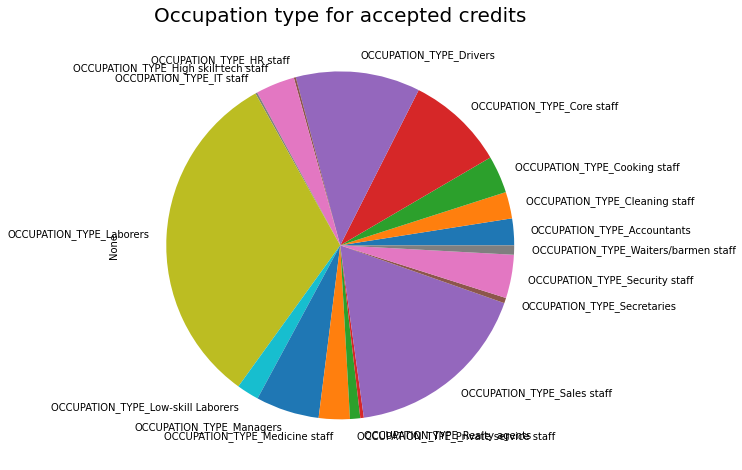

In [32]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

Text(0.5, 1.0, 'Occupation type for accepted credits')

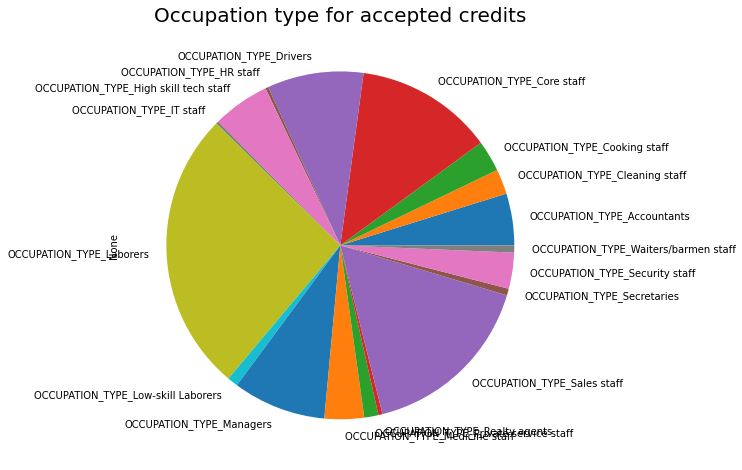

In [33]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

# Logisitc regression

In [34]:
def score_sensibility(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
    sensibility = tp/(tp+fn)
    print("Sensibility (rate of true positif) {0:.3f}".format(sensibility))
    specificity = tn/(fp+tn)
    print("Specificity (rate of true negatif) {0:.3f}".format(specificity))
    precision = tp/(tp+fp)
    print("Precision (proportion of correct prediction of positif) {0:.3f}".format(precision))
    accuracy = (tp+tn)/(tn+fp+tp+fp)
    print("Precision (proportion of correct prediction) {0:.3f}\n".format(accuracy))
    return sensibility

In [35]:
scalerX = StandardScaler()
scalerY = StandardScaler()
X_scaled = scalerX.fit_transform(data.copy())
Y = target.copy()
Y.replace({0: False, 1: True}, inplace=True)
Y_scaled = scalerY.fit_transform(Y)

In [36]:
%%time
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_scaled, Y)
print(skf)
StratifiedKFold(n_splits=4, random_state=42, shuffle = True)
skf.split(X_scaled, Y)

mdl = []
for train_index, test_index in skf.split(X_scaled, Y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    lr = LogisticRegression(C=10, max_iter = 5000).fit(X_train, np.ravel(y_train))
    y_pred = lr.predict(X_test)
    mdl.append(lr)
    sensibility = score_sensibility(y_test, y_pred)


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TN: 40485, FP: 4, FN: 4064, TP: 2
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.333
Precision (proportion of correct prediction) 1.000

TN: 40485, FP: 5, FN: 4063, TP: 2
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.286
Precision (proportion of correct prediction) 1.000

TN: 40490, FP: 0, FN: 4064, TP: 1
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 1.000
Precision (proportion of correct prediction) 1.000

TN: 40485, FP: 5, FN: 4064, TP: 1
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.167
Precision (proportion of correct prediction) 1.000

TN: 40490, FP: 0, 

# Random forest

In [37]:
%%time
mdl_clf = []
for train_index, test_index in skf.split(X_scaled, Y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, np.ravel(y_train))
    y_pred = clf.predict(X_test)
    mdl_clf.append(clf)
    sensibility = score_sensibility(y_test, y_pred)
#RandomForestClassifier(...)
#print(clf.predict([[0, 0, 0, 0]]))

TN: 40489, FP: 0, FN: 4064, TP: 2
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 1.000
Precision (proportion of correct prediction) 1.000

TN: 40490, FP: 0, FN: 4065, TP: 0
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) nan
Precision (proportion of correct prediction) 1.000



<ipython-input-34-6e1929bcabd4>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp)


TN: 40489, FP: 1, FN: 4064, TP: 1
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.500
Precision (proportion of correct prediction) 1.000

TN: 40490, FP: 0, FN: 4064, TP: 1
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 1.000
Precision (proportion of correct prediction) 1.000

TN: 40490, FP: 0, FN: 4063, TP: 2
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 1.000
Precision (proportion of correct prediction) 1.000

Wall time: 3min 44s


## Reduce features dimension

We use attibute **feature_importances_** to select features that contribute the most to prediction. 

In [38]:
features = []
for cpt, col in enumerate(data.columns):
    #clf.feature_importances_
    if clf.feature_importances_[cpt] > 0.001:
        print(col+" {0:.4f}".format(clf.feature_importances_[cpt]))
        features.append(col)

AMT_INCOME_TOTAL 0.0594
AMT_ANNUITY 0.0773
AMT_GOODS_PRICE 0.0608
AGE 0.0851
DAYS_EMPLOYED 0.0854
OWN_CAR_AGE 0.0275
CNT_FAM_MEMBERS 0.0260
NAME_INCOME_TYPE_Commercial associate 0.0078
NAME_INCOME_TYPE_State servant 0.0040
NAME_INCOME_TYPE_Working 0.0084
NAME_EDUCATION_TYPE_Higher education 0.0042
NAME_EDUCATION_TYPE_Incomplete higher 0.0026
NAME_EDUCATION_TYPE_Lower secondary 0.0019
NAME_EDUCATION_TYPE_Secondary / secondary special 0.0050
FLAG_OWN_CAR_Y 0.0069
FLAG_OWN_REALTY_Y 0.0132
NAME_FAMILY_STATUS_Civil marriage 0.0071
NAME_FAMILY_STATUS_Married 0.0090
NAME_FAMILY_STATUS_Separated 0.0050
NAME_FAMILY_STATUS_Single / not married 0.0070
NAME_FAMILY_STATUS_Widow 0.0022
NAME_CONTRACT_TYPE_Cash loans 0.0023
NAME_CONTRACT_TYPE_Revolving loans 0.0022
CODE_GENDER_M 0.0090
NAME_HOUSING_TYPE_House / apartment 0.0070
NAME_HOUSING_TYPE_Municipal apartment 0.0037
NAME_HOUSING_TYPE_Office apartment 0.0014
NAME_HOUSING_TYPE_Rented apartment 0.0034
NAME_HOUSING_TYPE_With parents 0.0054
OCCUPATIO

In [39]:
print("initial features {0}, keep only {1}".format(len(data.columns), len(features)))

initial features 69, keep only 55


In [40]:
scalerX = StandardScaler()
scalerY = StandardScaler()
X_scaled = scalerX.fit_transform(data[features].copy())
Y = target.copy()
#Y.replace({0: False, 1: True}, inplace=True)

In [41]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_scaled, Y)
print(skf)
StratifiedKFold(n_splits=4, random_state=42, shuffle = True)
skf.split(X_scaled, Y)

mdl = []
for train_index, test_index in skf.split(X_scaled, Y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    lr = LogisticRegression(C=0.01, max_iter = 5000).fit(X_train, np.ravel(y_train))
    y_pred = lr.predict(X_test)
    mdl.append(lr)
    sensibility = score_sensibility(y_test, y_pred)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TN: 40486, FP: 3, FN: 4065, TP: 1
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.250
Precision (proportion of correct prediction) 1.000

TN: 40487, FP: 3, FN: 4063, TP: 2
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.400
Precision (proportion of correct prediction) 1.000

TN: 40490, FP: 0, FN: 4064, TP: 1
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 1.000
Precision (proportion of correct prediction) 1.000

TN: 40487, FP: 3, FN: 4065, TP: 0
Sensibility (rate of true positif) 0.000
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.000
Precision (proportion of correct prediction) 1.000

TN: 40490, FP: 0, 

Results are weak, the ML reject few candidates with bad profile.

## SVM 

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVR

In [ ]:
%%time
scalerX = StandardScaler()
scalerY = StandardScaler()
X_scaled = scalerX.fit_transform(data[features].copy())
Y = target.copy()
Y_scaled = scalerY.fit_transform(target.copy())
Y.replace({0: False, 1: True}, inplace=True)

skf.get_n_splits(X_scaled, Y)
print(skf)
skf = StratifiedKFold(n_splits=4, random_state=42, shuffle = True)
skf.split(X_scaled, Y)

mdl_svc = []
for train_index, test_index in skf.split(X_scaled, Y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    clf = SVC(kernel = 'linear').fit(X_train, np.ravel(y_train))
    y_pred = clf.predict(X_test)
    mdl_svc.append(clf)
    sensibility = score_sensibility(y_test, y_pred)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
fn

In [ ]:
tp

In [ ]:
np.where(y_test == 1)